# 对天涯论坛“GDP”相关帖子的标题建立主题模型

## 1.加载相关数据包

In [49]:
import sys
import jieba.analyse

## 2.按行读取数据

In [29]:
with open('C:/Users/admin/Desktop/finalproject/tianya_bbs_threads_list_gdp_title1.txt', 'r') as f:
    reports1 = f.readlines()

## 3.清洗数据

In [30]:
def clean_txt(txt):
    for i in [u'、', u'，', u'—', u'！', u'。', u'《', u'》', u'（', u'）']:
        txt = txt.replace(i, ' ')
    return txt

## 4.添加停用词

In [31]:
filename = 'C:/Users/admin/Desktop/finalproject/stopwords.txt'
stopwords = {}
f = open(filename, 'r')
line = f.readline().rstrip()
while line:
    stopwords.setdefault(line, 0)
    stopwords[line.decode('utf-8')] = 1
    line = f.readline().rstrip()
f.close()

In [32]:
def cleancntxt(txt, stopwords):
    tfidf1000= jieba.analyse.extract_tags(txt, topK=1000, withWeight=False)
    seg_generator = jieba.cut(txt, cut_all=False)
    seg_list = [i for i in seg_generator if i not in stopwords]
    seg_list = [i for i in seg_list if i != u' ']
    seg_list = [i for i in seg_list if i in tfidf1000]
    return(seg_list)

## 5.主题模型预处理，词频分析

In [33]:
import gensim
from gensim import corpora, models, similarities

In [34]:
processed_docs = [cleancntxt(doc, stopwords) for doc in reports1]
word_count_dict = gensim.corpora.Dictionary(processed_docs)
print "In the corpus there are", len(word_count_dict), "unique tokens"
bag_of_words_corpus = [word_count_dict.doc2bow(pdoc) for pdoc in processed_docs]

In the corpus there are 3692 unique tokens


In [35]:
tfidf = models.TfidfModel(bag_of_words_corpus )
corpus_tfidf = tfidf[bag_of_words_corpus ]
lda_model = gensim.models.LdaModel(corpus_tfidf, num_topics=20, id2word=word_count_dict, passes=10)

In [36]:
def inferTopicNumber(bag_of_words_corpus, num, word_count_dict):
    lda_model = gensim.models.LdaModel(bag_of_words_corpus, num_topics=num, id2word=word_count_dict, passes=10)
    _ = lda_model.print_topics(-1) #use _ for throwaway variables.
    logperplexity = lda_model.log_perplexity(bag_of_words_corpus)
    return logperplexity

In [37]:
perplexity_list = [inferTopicNumber(bag_of_words_corpus, num, word_count_dict) for num in [5, 15, 20, 25, 30, 35, 40 ]]

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

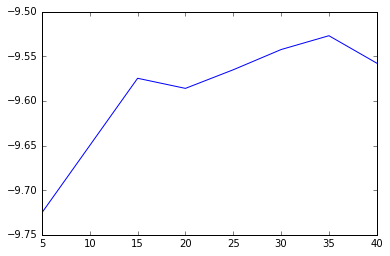

In [53]:
plt.plot([5, 15, 20, 25, 30, 35, 40], perplexity_list)

In [54]:
topictermlist = lda_model.print_topics(-1)
topictermlist

[(0,
  u'0.006*\u589e\u957f + 0.004*\u4e2d\u56fd + 0.004*2013 + 0.004*\u8f6c\u8f7d + 0.003*2014 + 0.003*\u5e94\u8be5 + 0.003*\u4eba\u7c7b + 0.003*\u7ecf\u6d4e + 0.003*\u8fd8\u662f + 0.003*\u5e73\u7a33'),
 (1,
  u'0.009*\u4ebf\u7f8e\u5143 + 0.008*\u4e09\u5341\u516d\u4e07 + 0.007*\u6211\u56fd + 0.007*\u603b\u91cf + 0.006*\u4eba\u5747 + 0.005*\u8fbe\u5230 + 0.004*\u8ba1\u7b97 + 0.003*\u4e2d\u56fd + 0.003*\u8f6c\u8f7d + 0.003*\u5168\u56fd'),
 (2,
  u'0.005*\u4e2d\u56fd + 0.005*\u8f6c\u8f7d + 0.004*\u7ecf\u6d4e + 0.004*\u6570\u636e + 0.004*\u589e\u957f + 0.004*2013 + 0.004*\u9884\u6d4b + 0.004*\u4e16\u754c + 0.003*\u4f4e\u4f30 + 0.003*\u4ec0\u4e48'),
 (3,
  u'0.005*\u4e2d\u56fd + 0.004*\u8f6c\u8f7d + 0.004*\u660e\u5e74 + 0.004*\u5de5\u4f5c + 0.004*\u589e\u901f + 0.004*gdp + 0.003*\u65e5\u672c + 0.003*7.5 + 0.003*\u4f1a\u8bae + 0.003*\u4e2d\u592e'),
 (4,
  u'0.004*\u4e2d\u56fd + 0.004*\u589e\u901f + 0.003*... + 0.003*\u7701\u4efd + 0.003*\u62a5\u544a + 0.003*147 + 0.003*\u56fd\u5bb6 + 0.003*

In [55]:
topictermlist = lda_model.print_topics(-1)
topictermlist1 = list(topictermlist)

In [56]:
top2=[list(i) for i in topictermlist1]
top2[1]

[1,
 u'0.009*\u4ebf\u7f8e\u5143 + 0.008*\u4e09\u5341\u516d\u4e07 + 0.007*\u6211\u56fd + 0.007*\u603b\u91cf + 0.006*\u4eba\u5747 + 0.005*\u8fbe\u5230 + 0.004*\u8ba1\u7b97 + 0.003*\u4e2d\u56fd + 0.003*\u8f6c\u8f7d + 0.003*\u5168\u56fd']

In [57]:
top3=[str(i) for i in topictermlist1]

In [18]:
top_words = [[j.split('*')[1] for j in i.split(' + ')] for i in top3]
for i in top_words: print " ".join(i) + '\n'

2015 \u7f8e\u56fd 6.9 \u8f6c\u8f7d \u589e\u901f \u624d\u80fd 25 \u5c45\u5b89\u601d\u5371 \u8749\u8054 \u51a0\u519b')

\u589e\u957f \u4e2d\u56fd \u8f6c\u8f7d \u4e09\u5b63\u5ea6 7.7 \u8fd8\u662f \u6570\u636e \u5173\u6ce8 \u7f8e\u56fd \u8d85\u8fc7')

... \u4e00\u5b63\u5ea6 \u589e\u901f \u4e2d\u56fd \u8f6c\u8f7d CPI \u5de6\u53f3 \u7ecf\u6d4e 14 \u4eca\u5e74')

\u8f6c\u8f7d \u4e2d\u56fd \u6570\u636e \u589e\u901f \u9886\u8854 \u6f6e\u6765 \u4e00\u640f \u5723\u8bde\u8282 2013 \u5168\u56fd')

\u4e2d\u56fd \u76ee\u6807 \u8f6c\u8f7d \u4eba\u5747 \u82f1\u56fd \u9ec4\u91d1 2013 \u589e\u957f \u8d85\u8fc7 829')

\u7ecf\u6d4e \u4e2d\u56fd 2012 \u6570\u636e \u8f6c\u8f7d ... \u589e\u957f \u4ec0\u4e48 \u56fd\u5bb6 gdp')

\u589e\u957f \u8f6c\u8f7d \u4e3a\u4ec0\u4e48 \u4eba\u5747 \u7ecf\u6d4e \u4eba\u7c7b \u4e2d\u56fd \u9ec4\u91d1 \u5e7f\u4e1c 1017')

\u589e\u901f \u8f6c\u8f7d \u4e2d\u56fd \u805a\u7126 \u7ecf\u6d4e \u4ee5\u4e0a \u4e0d\u80fd \u589e\u957f 6.8 \u8fc7\u5269')

\u4eba\u5747 \u4e2d\u56fd \u6392

In [58]:
import numpy as np

top_words_shares = [map(float, i) for i in top_words_shares]
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 5)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*10))
        n += 1

In [24]:
for i in top3:   
    y=str(i).split(' + ')
    for i in y:
        a=i.decode('unicode_escape')
        print a

(0, u'0.008*2015
0.007*美国
0.006*6.9
0.006*转载
0.005*增速
0.005*才能
0.005*25
0.005*居安思危
0.005*蝉联
0.005*冠军')
(1, u'0.006*增长
0.005*中国
0.004*转载
0.003*三季度
0.003*7.7
0.003*还是
0.003*数据
0.003*关注
0.003*美国
0.003*超过')
(2, u'0.005*...
0.004*一季度
0.004*增速
0.004*中国
0.004*转载
0.004*CPI
0.004*左右
0.003*经济
0.003*14
0.003*今年')
(3, u'0.005*转载
0.004*中国
0.004*数据
0.004*增速
0.004*领衔
0.004*潮来
0.004*一搏
0.004*圣诞节
0.004*2013
0.004*全国')
(4, u'0.004*中国
0.003*目标
0.003*转载
0.003*人均
0.003*英国
0.003*黄金
0.003*2013
0.003*增长
0.003*超过
0.003*829')
(5, u'0.007*经济
0.006*中国
0.005*2012
0.004*数据
0.004*转载
0.004*...
0.003*增长
0.003*什么
0.003*国家
0.003*gdp')
(6, u'0.004*增长
0.004*转载
0.004*为什么
0.003*人均
0.003*经济
0.003*人类
0.003*中国
0.003*黄金
0.002*广东
0.002*1017')
(7, u'0.005*增速
0.004*转载
0.003*中国
0.003*聚焦
0.003*经济
0.003*以上
0.003*不能
0.003*增长
0.003*6.8
0.003*过剩')
(8, u'0.004*人均
0.004*中国
0.003*排名
0.003*...
0.003*预期
0.003*31
0.003*城市
0.003*房价
0.003*公布
0.003*Q1')
(9, u'0.005*转载
0.004*中国
0.003*各省
0.003*一个
0.003*美国
0.003*同比
0.003*什么
0.003*一季度
0.003*造假
0.003

### 由词频统计可以看出与“GDP”有关的天涯帖子中，2015年相关的帖子最多，再是“增长”、“地方”等词语。

# 6.建立主题模型

In [59]:
import numpy as np

In [60]:
x=[]
j=[(0, '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (1, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (2, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (3, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (4, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (5, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (6, '0.003', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (7, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (8, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (9, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (10,'0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (11, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (12, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (13, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (14, '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (15, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (16, '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001'),
   (17, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (18, '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000'),
   (19, '0.002', '0.002', '0.002', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001', '0.001')]
for i in j:
    top_words_shares = map(float, i)
    x.append(top_words_shares)
    top_words_shares=x
print top_words_shares
def weightvalue(x):
    return (x - np.min(top_words_shares))*40/(np.max(top_words_shares) -np.min(top_words_shares)) + 10
 
top_words_shares = [map(weightvalue, i) for i in top_words_shares]  

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  # plot numbering starts with 1
        plt.ylim(0, num_top_words)  # stretch the y-axis to accommodate the words
        plt.xticks([])  # remove x-axis markings ('ticks')
        plt.yticks([]) # remove y-axis markings ('ticks')
        plt.title(u'主题 #{}'.format(t+1), size = 5)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word, fontsize= np.log(share*10))
        n += 1

[[0.0, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [6.0, 0.003, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], [7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [11.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [13.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [14.0, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], [15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [16.0, 0.002, 0.002, 

# 7.将主题模型显示转化为中文显示

In [67]:
import matplotlib.pyplot as plt
import matplotlib
zhfont1 = matplotlib.font_manager.FontProperties(fname='C:/users/admin/Desktop/finalproject/msyh.ttc')

def plotTopics(mintopics, maxtopics):
    num_top_words = 10
    plt.rcParams['figure.figsize'] = (10.0, 4.0)  
    n = 0
    for t in range(mintopics , maxtopics):
        plt.subplot(2, 15, n + 1)  
        plt.ylim(0, num_top_words)  
        plt.xticks([])  
        plt.yticks([]) 
        plt.title(u'主题#%i'%t,size=10,fontproperties=zhfont1)
        words = top_words[t][0:num_top_words ]
        words_shares = top_words_shares[t][0:num_top_words ]
        for i, (word, share) in enumerate(zip(words, words_shares)):
            plt.text(0.05, num_top_words-i-0.9, word.decode('unicode_escape'), fontsize= np.log(share*10)*2,fontproperties=zhfont1)
        n += 1

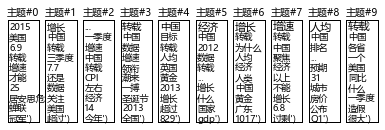

In [68]:
plotTopics(0, 10)

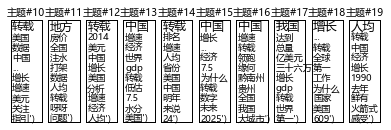

In [69]:
plotTopics(10, 20)

### 从建立主题模型的结果上来看，关于中国、增长和地方的主题比较明显。还可以发现，一些文章在很多主题下都有更高的权重，因为他们比较长并且包含的关键词出现在不同主题里，其他一些文章在大多主题下权重都很低。